In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline


In [3]:
df = pd.read_csv('./Processed_data/year_text_keywords_affiliation.csv',index_col=0)

df.head()

,Id,year,text,keywords,affiliation
0,24877594,2014.0,what we know and do not know about the canna...,cannabinoid receptor 2 ; endocannabinoid ; i...,[]
1,16889837,2006.0,allosteric agonist of 7tm receptor expand th...,NaN,glaxosmithkline
2,31068464,2019.0,mrgprx4 be a g protein - couple receptor act...,mrgprx4 ; bile acid ; cholestasis ; itch ; p...,[' the johns hopkins university']
3,30610192,2019.0,modulation of gpr39 a g - protein couple rec...,NaN,"[' oregon national primate research center, or..."
4,30289386,2018.0,simulation of spontaneous g protein activati...,g protein ; markov state model ; allostery ;...,[' washington university']


In [22]:
df_nonindustry = df.loc[df.affiliation.apply(lambda x: x[0] == '[' and x != '[]')]
df_nonindustry.shape

(162784, 5)

In [23]:
df_academia = df.loc[df.affiliation.apply(lambda x: 'university' in x)]
df_academia.shape

(162784, 5)

In [11]:
df_na = df.loc[df.affiliation.apply(lambda x: x == '[]')]
df_na.shape           

(152354, 5)

In [24]:
df_industry = df.loc[df.affiliation.apply(lambda x: x[0] != '[')]
df_industry.shape

(8508, 5)

In [25]:
df_academia.head()

,Id,year,text,keywords,affiliation
2,31068464,2019.0,mrgprx4 be a g protein - couple receptor act...,mrgprx4 ; bile acid ; cholestasis ; itch ; p...,[' the johns hopkins university']
3,30610192,2019.0,modulation of gpr39 a g - protein couple rec...,NaN,"[' oregon national primate research center, or..."
4,30289386,2018.0,simulation of spontaneous g protein activati...,g protein ; markov state model ; allostery ;...,[' washington university']
5,30066935,2018.0,gpr56 promote proliferation of colorectal ca...,NaN,[' the first affiliated hospital of nanjing me...
6,30026541,2018.0,arrestin as rheostat of gpcr signal,NaN,[' university']


In [26]:
df_industry.head()

,Id,year,text,keywords,affiliation
1,16889837,2006.0,allosteric agonist of 7tm receptor expand th...,NaN,glaxosmithkline
50,10485282,1999.0,dominant negative mutation in the alpha - fa...,NaN,roche
83,21461560,2011.0,impair left - ventricular cardiac function i...,NaN,bayer
86,27589480,2016.0,design and synthesis of an investigational n...,NaN,takeda
109,30114904,2018.0,large scale synthetic site saturation gpcr l...,NaN,astrazeneca


In [16]:
df_na.head()

,Id,year,text,keywords,affiliation
0,24877594,2014.0,what we know and do not know about the canna...,cannabinoid receptor 2 ; endocannabinoid ; i...,[]
7,19223991,2009.0,expression and localization of gpr109a puma ...,NaN,[]
8,19865172,2009.0,regulation of inflammatory response by gut m...,NaN,[]
16,22390759,2012.0,the endothelin axis as therapeutic target in...,NaN,[]
21,21835172,2011.0,the clozapine metabolite n - desmethylclozap...,NaN,[]


In [63]:
df_genes = pd.read_csv('./drug_discovery/gpcr_gene_with_ref_year.csv',index_col=0)[['Symbol','ref_number']].sort_values(by='ref_number',ascending = False)
df_genes.head()

,Symbol,ref_number
273,met,125894
362,smo,17421
120,cxcr4,7871
284,ccr2,2552
24,cxcr3,1983


In [64]:
df_genes = df_genes.loc[df_genes['ref_number'] > 0]
df_genes.shape

(420, 2)

In [65]:
df_genes['Symbol'] = df_genes['Symbol'].apply(lambda x: x.replace(x,' '+x+' '))

In [73]:
print(len(df_genes.Symbol.iloc[0]))

5


In [107]:
df_industry['gene'] = ['' for i in range(df_industry.shape[0])]
df_academia['gene'] = ['' for i in range(df_academia.shape[0])]
df_genes['count_industry'] = [0 for i in range(df_genes.shape[0])]
df_genes['count_academia'] = [0 for i in range(df_genes.shape[0])]

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [108]:
for g in tqdm(range(df_genes.shape[0])):
    gene = df_genes.Symbol.iloc[g]
    c = 0
    for i in range(df_industry.shape[0]):
        if gene in df_industry.text.iloc[i]:
            df_industry.gene.iloc[i] += gene
            c += 1
    df_genes['count_industry'].iloc[g] += c




  0%|          | 0/420 [00:00<?, ?it/s]/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 1/420 [00:00<01:16,  5.45it/s]

  0%|          | 2/420 [00:00<01:17,  5.38it/s]

  1%|          | 3/420 [00:00<01:21,  5.10it/s]

  1%|          | 4/420 [00:00<01:24,  4.93it/s]

  1%|          | 5/420 [00:01<01:35,  4.34it/s]

  1%|▏         | 6/420 [00:01<01:30,  4.59it/s]

  2%|▏         | 7/420 [00:01<01:26,  4.78it/s]

  2%|▏         | 8/420 [00:01<01:33,  4.42it/s]

  2%|▏         | 9/420 [00:01<01:30,  4.56it/s]

  2%|▏         | 10/420 [00:02<01:25,  4.82it/s]

  3%|▎         | 11/420 [00:02<01:24,  4.86it/s]

  3%|▎         | 12/420 [00:02<01:21,  4.99it/s]

  3%|▎         | 13/420 [00:02<01:27,  4.64it/s]



 33%|███▎      | 140/420 [00:24<00:45,  6.15it/s]

 34%|███▎      | 141/420 [00:24<00:45,  6.11it/s]

 34%|███▍      | 142/420 [00:24<00:45,  6.09it/s]

 34%|███▍      | 143/420 [00:25<00:45,  6.10it/s]

 34%|███▍      | 144/420 [00:25<00:44,  6.21it/s]

 35%|███▍      | 145/420 [00:25<00:43,  6.36it/s]

 35%|███▍      | 146/420 [00:25<00:42,  6.38it/s]

 35%|███▌      | 147/420 [00:25<00:41,  6.51it/s]

 35%|███▌      | 148/420 [00:25<00:41,  6.57it/s]

 35%|███▌      | 149/420 [00:25<00:41,  6.47it/s]

 36%|███▌      | 150/420 [00:26<00:40,  6.60it/s]

 36%|███▌      | 151/420 [00:26<00:40,  6.61it/s]

 36%|███▌      | 152/420 [00:26<00:40,  6.60it/s]

 36%|███▋      | 153/420 [00:26<00:40,  6.60it/s]

 37%|███▋      | 154/420 [00:26<00:39,  6.66it/s]

 37%|███▋      | 155/420 [00:26<00:39,  6.66it/s]

 37%|███▋      | 156/420 [00:27<00:40,  6.46it/s]

 37%|███▋      | 157/420 [00:27<00:40,  6.55it/s]

 38%|███▊      | 158/420 [00:27<00:40,  6.41it/s]

 38%|███▊      | 159/420 [00:27

 67%|██████▋   | 283/420 [00:48<00:23,  5.88it/s]

 68%|██████▊   | 284/420 [00:48<00:23,  5.72it/s]

 68%|██████▊   | 285/420 [00:48<00:22,  5.91it/s]

 68%|██████▊   | 286/420 [00:48<00:23,  5.80it/s]

 68%|██████▊   | 287/420 [00:48<00:23,  5.74it/s]

 69%|██████▊   | 288/420 [00:49<00:25,  5.15it/s]

 69%|██████▉   | 289/420 [00:49<00:26,  4.87it/s]

 69%|██████▉   | 290/420 [00:49<00:26,  5.00it/s]

 69%|██████▉   | 291/420 [00:49<00:23,  5.40it/s]

 70%|██████▉   | 292/420 [00:49<00:24,  5.17it/s]

 70%|██████▉   | 293/420 [00:50<00:23,  5.37it/s]

 70%|███████   | 294/420 [00:50<00:22,  5.58it/s]

 70%|███████   | 295/420 [00:50<00:21,  5.89it/s]

 70%|███████   | 296/420 [00:50<00:20,  6.02it/s]

 71%|███████   | 297/420 [00:50<00:20,  5.92it/s]

 71%|███████   | 298/420 [00:50<00:21,  5.79it/s]

 71%|███████   | 299/420 [00:51<00:20,  6.05it/s]

 71%|███████▏  | 300/420 [00:51<00:21,  5.52it/s]

 72%|███████▏  | 301/420 [00:51<00:20,  5.68it/s]

 72%|███████▏  | 302/420 [00:51

In [111]:
df_genes=df_genes.drop('count',axis=1)

In [113]:
for g in tqdm(range(df_genes.shape[0])):
    gene = df_genes.Symbol.iloc[g]
    c = 0
    for i in range(df_academia.shape[0]):
        if gene in df_academia.text.iloc[i]:
            df_academia.gene.iloc[i] += gene
            c += 1
    df_genes['count_academia'].iloc[g] += c



  0%|          | 0/420 [00:00<?, ?it/s]/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


  0%|          | 1/420 [00:04<32:09,  4.60s/it]

  0%|          | 2/420 [00:10<33:45,  4.85s/it]

  1%|          | 3/420 [00:35<1:17:29, 11.15s/it]

  1%|          | 4/420 [00:45<1:13:26, 10.59s/it]

  1%|          | 5/420 [00:53<1:08:58,  9.97s/it]

  1%|▏         | 6/420 [01:01<1:04:25,  9.34s/it]

  2%|▏         | 7/420 [01:04<51:24,  7.47s/it]  

  2%|▏         | 8/420 [01:13<53:05,  7.73s/it]

  2%|▏         | 9/420 [01:20<52:11,  7.62s/it]

  2%|▏         | 10/420 [01:27<51:31,  7.54s/it]

  3%|▎         | 11/420 [01:34<48:59,  7.19s/it]

  3%|▎         | 12/420 [01:40<47:17,  6.96s/it]

  3%|▎         | 13/420 [01:45<43:31,  6

 33%|███▎      | 140/420 [09:38<15:04,  3.23s/it]

 34%|███▎      | 141/420 [09:41<14:38,  3.15s/it]

 34%|███▍      | 142/420 [09:44<14:12,  3.07s/it]

 34%|███▍      | 143/420 [09:47<14:22,  3.11s/it]

 34%|███▍      | 144/420 [09:50<14:25,  3.14s/it]

 35%|███▍      | 145/420 [09:54<14:29,  3.16s/it]

 35%|███▍      | 146/420 [09:57<14:35,  3.19s/it]

 35%|███▌      | 147/420 [10:00<14:27,  3.18s/it]

 35%|███▌      | 148/420 [10:03<14:07,  3.11s/it]

 35%|███▌      | 149/420 [10:06<13:49,  3.06s/it]

 36%|███▌      | 150/420 [10:09<13:37,  3.03s/it]

 36%|███▌      | 151/420 [10:12<13:18,  2.97s/it]

 36%|███▌      | 152/420 [10:15<13:10,  2.95s/it]

 36%|███▋      | 153/420 [10:18<13:00,  2.92s/it]

 37%|███▋      | 154/420 [10:20<12:54,  2.91s/it]

 37%|███▋      | 155/420 [10:23<13:05,  2.97s/it]

 37%|███▋      | 156/420 [10:27<13:12,  3.00s/it]

 37%|███▋      | 157/420 [10:30<13:03,  2.98s/it]

 38%|███▊      | 158/420 [10:32<12:41,  2.90s/it]

 38%|███▊      | 159/420 [10:35

 67%|██████▋   | 283/420 [17:03<06:45,  2.96s/it]

 68%|██████▊   | 284/420 [17:06<06:52,  3.03s/it]

 68%|██████▊   | 285/420 [17:09<06:42,  2.98s/it]

 68%|██████▊   | 286/420 [17:12<06:37,  2.97s/it]

 68%|██████▊   | 287/420 [17:15<06:31,  2.95s/it]

 69%|██████▊   | 288/420 [17:18<06:24,  2.91s/it]

 69%|██████▉   | 289/420 [17:20<06:14,  2.86s/it]

 69%|██████▉   | 290/420 [17:23<06:12,  2.87s/it]

 69%|██████▉   | 291/420 [17:26<06:09,  2.86s/it]

 70%|██████▉   | 292/420 [17:29<06:07,  2.87s/it]

 70%|██████▉   | 293/420 [17:32<06:01,  2.84s/it]

 70%|███████   | 294/420 [17:34<05:56,  2.83s/it]

 70%|███████   | 295/420 [17:37<05:49,  2.80s/it]

 70%|███████   | 296/420 [17:40<06:05,  2.95s/it]

 71%|███████   | 297/420 [17:44<06:13,  3.04s/it]

 71%|███████   | 298/420 [17:47<06:18,  3.10s/it]

 71%|███████   | 299/420 [17:51<06:48,  3.38s/it]

 71%|███████▏  | 300/420 [17:54<06:35,  3.30s/it]

 72%|███████▏  | 301/420 [17:57<06:23,  3.22s/it]

 72%|███████▏  | 302/420 [18:00

In [97]:
df_industry.loc[df_industry.Id == 26048307].text.values

array(['  biochemical characterization of smoothen receptor antagonist by bind kinetic against drug - resistant mutant hedgehog hh signal critical for development differentiation and cell growth be involve in several cancer include medulloblastoma and basal cell carcinoma although antagonism of the smoothen receptor smo which mediate hh signal be an attractive therapeutic target a drug - resistant mutation in smo smo - d473h be identify in a clinical trial of the approve drug vismodegib tak-441 potently inhibit smo - d473h unlike vismodegib and another smo antagonist cyclopamine whereas the difference in bind mode between these antagonist remain unknown here we report the biochemical characterization of tak-441 vismodegib and cyclopamine by bind kinetic the association kon and dissociation koff rate be determine by kinetic bind study use 3htak-441 and dissociation be confirm by label - free affinity selection - mass spectrometry as - ms in the 3htak-441 competition assay tak-441 but no

In [114]:
df_genes.head()

,Symbol,ref_number,count_industry,count_academia
273,met,125894,3,58
362,smo,17421,20,452
120,cxcr4,7871,84,4168
284,ccr2,2552,74,1215
24,cxcr3,1983,29,1104


In [156]:
df = df_genes.loc[df_genes['count_academia']>0]
df

,Symbol,ref_number,count_industry,count_academia,ratio
273,met,125894,3,58,0.051724
362,smo,17421,20,452,0.044248
120,cxcr4,7871,84,4168,0.020154
284,ccr2,2552,74,1215,0.060905
24,cxcr3,1983,29,1104,0.026268
...,...,...,...,...,...
786,pkdrej,2,0,2,0.000000
578,or7c1,2,0,1,0.000000
512,or52a1,2,0,1,0.000000
404,or10h1,2,0,1,0.000000


In [157]:
drugs = pd.read_csv('./drug_discovery/gene_drug_trend_full.csv',index_col=0).dropna()
drugs.head()

,GPCR,Number of Drugs,Symbol,ref_number
0,hrh1,91,hrh1,57.0
2,chrm1,86,chrm1,46.0
3,drd2,78,drd2,1482.0
5,chrm2,73,chrm2,70.0
6,htr2a,73,htr2a,433.0


In [158]:
df['ratio'] = df['count_industry']/df['count_academia']

/Users/shunling/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [159]:
df = df.sort_values(by='ratio',ascending=False)

In [171]:
df.Symbol = df.Symbol.apply(lambda x: x[1:-1])

In [182]:
dfall = df.merge(drugs[['GPCR','Number of Drugs']],left_on = 'Symbol', right_on = 'GPCR', how = 'left')

In [183]:
dfall['Number of Drugs'] = dfall['Number of Drugs'].fillna(0)

In [188]:
dfall = dfall.drop('ref_number',axis=1)
dfall = dfall.drop('GPCR',axis = 1)

In [165]:
df.to_csv('./ResearchTrend/count_industry_academia_genes.csv')

In [184]:
ind_sum = sum(dfall['count_industry'])
aca_sum = sum(dfall['count_academia'])
ratio_sum = sum(dfall['ratio'])
drug_sum = sum(dfall['Number of Drugs'])

(0, 200)

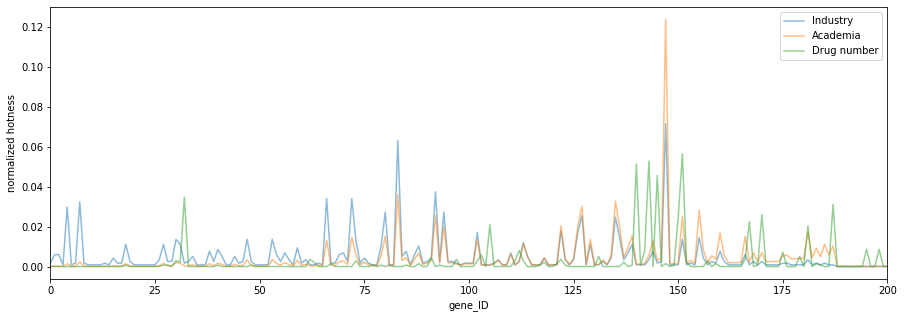

In [192]:
fig = plt.figure(figsize=(15,5))
plt.plot(range(df.shape[0]), dfall['count_industry']/ind_sum, alpha=0.5, label = 'Industry')

plt.plot(range(df.shape[0]), dfall['count_academia']/aca_sum, alpha=0.5, label = 'Academia')

plt.plot(range(df.shape[0]), dfall['Number of Drugs']/drug_sum, alpha=0.5, label = 'Drug number')
plt.xlabel('gene_ID')
plt.ylabel('normalized hotness')
plt.legend()
plt.xlim(0,200)

In [195]:
dfall.iloc[25:50]

,Symbol,count_industry,count_academia,ratio,Number of Drugs
25,gpr63,1,4,0.250000,0.0
26,gpr88,4,16,0.250000,0.0
27,gcgr,13,55,0.236364,1.0
28,trhr,3,13,0.230769,1.0
29,xpr1,3,13,0.230769,0.0
30,taar1,16,70,0.228571,4.0
31,gpbar1,13,57,0.228070,3.0
32,chrm4,2,9,0.222222,48.0
33,gpr183,3,14,0.214286,0.0
34,ffar2,6,30,0.200000,0.0


In [190]:
dfall.to_csv('./ResearchTrend/count_industry_academia_genes_drugs.csv')